<a href="https://colab.research.google.com/github/BillWorstell/ISBI2020_TUTORIAL/blob/master/03_Image_Details.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">Images <a href="https://mybinder.org/v2/gh/InsightSoftwareConsortium/SimpleITK-Notebooks/master?filepath=Python%2F03_Image_Details.ipynb"><img style="float: right;" src="https://mybinder.org/badge_logo.svg"></a></h1>

<table width="100%">
<tr style="background-color: red;"><td><font color="white">SimpleITK conventions:</font></td></tr>
<tr><td>
<ul>
<li>Image access is in x,y,z order, image.GetPixel(x,y,z) or image[x,y,z], with zero based indexing.</li>
<li>If the output of an ITK filter has non-zero starting index, then the index will be set to 0, and the origin adjusted accordingly.</li>
</ul>
</td></tr>
</table>

The unique feature of SimpleITK (derived from ITK) as a toolkit for image manipulation and analysis is that it views <b>images as physical objects occupying a bounded region in physical space</b>. In addition images can have different spacing between pixels along each axis, and the axes are not necessarily orthogonal. The following figure illustrates these concepts. 

<img src="ImageOriginAndSpacing.png" style="width:700px"/><br><br>


### Pixel Types

The pixel type is represented as an enumerated type. The following is a table of the enumerated list.

<table>
  <tr><td>sitkUInt8</td><td>Unsigned 8 bit integer</td></tr>
  <tr><td>sitkInt8</td><td>Signed 8 bit integer</td></tr>
  <tr><td>sitkUInt16</td><td>Unsigned 16 bit integer</td></tr>
  <tr><td>sitkInt16</td><td>Signed 16 bit integer</td></tr>
  <tr><td>sitkUInt32</td><td>Unsigned 32 bit integer</td></tr>
  <tr><td>sitkInt32</td><td>Signed 32 bit integer</td></tr>
  <tr><td>sitkUInt64</td><td>Unsigned 64 bit integer</td></tr>
  <tr><td>sitkInt64</td><td>Signed 64 bit integer</td></tr>
  <tr><td>sitkFloat32</td><td>32 bit float</td></tr>
  <tr><td>sitkFloat64</td><td>64 bit float</td></tr>
  <tr><td>sitkComplexFloat32</td><td>complex number of 32 bit float</td></tr>
  <tr><td>sitkComplexFloat64</td><td>complex number of 64 bit float</td></tr>
  <tr><td>sitkVectorUInt8</td><td>Multi-component of unsigned 8 bit integer</td></tr>
  <tr><td>sitkVectorInt8</td><td>Multi-component of signed 8 bit integer</td></tr>
  <tr><td>sitkVectorUInt16</td><td>Multi-component of unsigned 16 bit integer</td></tr>
  <tr><td>sitkVectorInt16</td><td>Multi-component of signed 16 bit integer</td></tr>
  <tr><td>sitkVectorUInt32</td><td>Multi-component of unsigned 32 bit integer</td></tr>
  <tr><td>sitkVectorInt32</td><td>Multi-component of signed 32 bit integer</td></tr>
  <tr><td>sitkVectorUInt64</td><td>Multi-component of unsigned 64 bit integer</td></tr>
  <tr><td>sitkVectorInt64</td><td>Multi-component of signed 64 bit integer</td></tr>
  <tr><td>sitkVectorFloat32</td><td>Multi-component of 32 bit float</td></tr>
  <tr><td>sitkVectorFloat64</td><td>Multi-component of 64 bit float</td></tr>
  <tr><td>sitkLabelUInt8</td><td>RLE label of unsigned 8 bit integers</td></tr>
  <tr><td>sitkLabelUInt16</td><td>RLE label of unsigned 16 bit integers</td></tr>
  <tr><td>sitkLabelUInt32</td><td>RLE label of unsigned 32 bit integers</td></tr>
  <tr><td>sitkLabelUInt64</td><td>RLE label of unsigned 64 bit integers</td></tr>
</table>

There is also `sitkUnknown`, which is used for undefined or erroneous pixel ID's. It has a value of -1.

The 64-bit integer types are not available on all distributions. When not available the value is `sitkUnknown`.

## Install SimpleITK and Environment

Expects to find on MyDrive:
 
/gdrive/MyDrive/SimpleITK-Notebooks/Python

/gdrive/MyDrive/SimpleITK-Notebooks/Python/requirements.txt

/gdrive/MyDrive/Fiji.app/ImageJ-linux64

<img src="figures/ImageOriginAndSpacing.png" style="width:700px"/><br><br>

In [ ]:
pip install virtualenv

     |████████████████████████████████| 7.2MB 8.7MB/s 
     |████████████████████████████████| 337kB 15.7MB/s 


In [ ]:
#!virtualenv ~/sitkpy --no-site-packages
!virtualenv ~/sitkpy

created virtual environment CPython3.7.10.final.0-64 in 1071ms
  creator CPython3Posix(dest=/root/sitkpy, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==21.0.1, setuptools==52.0.0, wheel==0.36.2
  activators BashActivator,CShellActivator,FishActivator,PowerShellActivator,PythonActivator,XonshActivator


In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
#!pip install -r '/gdrive/MyDrive/SimpleITK-Notebooks/Python/requirements.txt'
!~/sitkpy/bin/pip install -r '/gdrive/MyDrive/SimpleITK-Notebooks/Python/requirements.txt'

     |████████████████████████████████| 47.4 MB 48 kB/s 
     |████████████████████████████████| 11.5 MB 44.1 MB/s 
     |████████████████████████████████| 121 kB 52.9 MB/s 
     |████████████████████████████████| 15.3 MB 164 kB/s 
     |████████████████████████████████| 27.4 MB 70 kB/s 
     |████████████████████████████████| 9.9 MB 50.2 MB/s 
     |████████████████████████████████| 3.2 MB 41.8 MB/s 
     |████████████████████████████████| 108 kB 67.5 MB/s 
     |████████████████████████████████| 784 kB 45.2 MB/s 
     |████████████████████████████████| 2.2 MB 53.6 MB/s 
     |████████████████████████████████| 243 kB 71.3 MB/s 
     |████████████████████████████████| 120 kB 60.9 MB/s 
     |████████████████████████████████| 113 kB 55.0 MB/s 
     |████████████████████████████████| 100 kB 9.1 MB/s 
     |████████████████████████████████| 108 kB 34.9 MB/s 
     |████████████████████████████████| 428 kB 46.0 MB/s 
     |████████████████████████████████| 59 kB 5.4 MB/s 
     |████████████

In [ ]:
cd '/gdrive/MyDrive/SimpleITK-Notebooks/Python'

/gdrive/MyDrive/SimpleITK-Notebooks/Python


In [ ]:
pip install SimpleITK

  Using cached https://files.pythonhosted.org/packages/9c/6b/85df5eb3a8059b23a53a9f224476e75473f9bcc0a8583ed1a9c34619f372/SimpleITK-2.0.2-cp37-cp37m-manylinux2010_x86_64.whl


In [ ]:
pip install ipywidgets

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
%ls -ltr '/gdrive/MyDrive/Fiji.app/ImageJ-linux64'

-rw------- 1 root root 90243 Feb 27 18:15 /gdrive/MyDrive/Fiji.app/ImageJ-linux64


In [ ]:
!pip install itk

#!~/sitkpy/bin/pip install ITK

     |████████████████████████████████| 50.1MB 86kB/s 
     |████████████████████████████████| 14.4MB 345kB/s 
     |████████████████████████████████| 10.3MB 16.9MB/s 
     |████████████████████████████████| 14.0MB 29.9MB/s 
     |████████████████████████████████| 36.3MB 130kB/s 
     |████████████████████████████████| 68.0MB 118kB/s 


In [ ]:
!echo $PATH

/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin


In [ ]:
import os
#os.environ['PYTHONPATH'] += ":/content/gdrive/My Drive/Colab Notebooks/MNIST_Classifier/src"
os.environ['PATH'] += ":/content/gdrive/My Drive/Fiji.app"
! echo $PATH

/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin:/content/gdrive/My Drive/Fiji.app


In [ ]:
cd '/gdrive/MyDrive/SimpleITK-Notebooks/Python'

/gdrive/MyDrive/SimpleITK-Notebooks/Python


In [ ]:
import SimpleITK as sitk

%run update_path_to_download_script
from downloaddata import fetch_data, fetch_data_all

from ipywidgets import interact

print(sitk.Version())

SimpleITK Version: 2.0.2 (ITK 5.1)
Compiled: Dec  1 2020 22:01:03



In [ ]:
cd /usr/local/

/usr/local


In [ ]:
import shutil

In [ ]:
%ls /gdrive/MyDrive/

'Colab Notebooks'/                      SimpleITK_ISBI2020_TUTORIAL/
 Fiji.app/                              SimpleITK.jpg
 fiji-linux64-20170530.zip              SimpleITK-Notebooks/
 MyNiftyRec/                            unnamed.png
 MyTomoLab/                            'Untitled project.gscript'
 pyjnius-1.2.0-py37h90b5fae_0.tar.bz2


In [ ]:
shutil.copyfile('/gdrive/MyDrive/fiji-linux64-20170530.zip', '/usr/local/fiji-linux64-20170530.zip')

'/usr/local/fiji-linux64-20170530.zip'

In [ ]:
cd /usr/local

/usr/local


In [ ]:
!unzip ./fiji-linux64-20170530.zip

Archive:  ./fiji-linux64-20170530.zip
  inflating: Fiji.app/db.xml.gz      
  inflating: Fiji.app/Contents/Info.plist  
  inflating: Fiji.app/Contents/Resources/Fiji.icns  
  inflating: Fiji.app/Contents/Resources/ImageJ.icns  
  inflating: Fiji.app/ImageJ-linux64  
  inflating: Fiji.app/plugins/3D_Blob_Segmentation-3.0.0.jar  
  inflating: Fiji.app/plugins/3D_Objects_Counter-2.0.0.jar  
  inflating: Fiji.app/plugins/3D_Viewer-4.0.1.jar  
  inflating: Fiji.app/plugins/Algorithm_Launcher.jar  
  inflating: Fiji.app/plugins/Analyze/Dynamic_ROI_Profiler.clj  
  inflating: Fiji.app/plugins/Analyze/Measure_RGB.txt  
  inflating: Fiji.app/plugins/AnalyzeSkeleton_-3.1.2.jar  
  inflating: Fiji.app/plugins/Anisotropic_Diffusion_2D-2.0.0.jar  
  inflating: Fiji.app/plugins/Archipelago_Plugins-0.5.2.jar  
  inflating: Fiji.app/plugins/Arrow_-2.0.1.jar  
  inflating: Fiji.app/plugins/Auto_Threshold-1.16.4.jar  
  inflating: Fiji.app/plugins/BalloonSegmentation_-3.0.0.jar  
  inflating: Fiji.app/p

In [ ]:
#!pip install SimpleITK

In [ ]:
#!git clone https://github.com/InsightSoftwareConsortium/SimpleITK-Notebooks.git

In [ ]:
pip install ipywidgets

In [ ]:
# this will allow the notebook to reload/refresh automatically within the runtime
%reload_ext autoreload
%autoreload 2

from ipywidgets import interact

def f(x):
  return x

interact(f, x=10)

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.f>

In [ ]:
#pip install itk

In [ ]:
cd '/gdrive/MyDrive/SimpleITK-Notebooks/Python/'

/gdrive/MyDrive/SimpleITK-Notebooks/Python


In [ ]:
!python '/gdrive/MyDrive/SimpleITK-Notebooks/Python/update_path_to_download_script.py'

In [ ]:
import os
os.environ['PYTHONPATH'] += ":/content/gdrive/My Drive/Fiji.app"
! echo $PYTHONPATH
os.environ['PATH'] += ":/content/gdrive/My Drive/Fiji.app"
! echo $PATH

/env/python:/content/gdrive/My Drive/Fiji.app
/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin:/content/gdrive/My Drive/Fiji.app:/content/gdrive/My Drive/Fiji.app


In [ ]:
import numpy as np
import os
from ipywidgets import interact, fixed

%matplotlib inline
import matplotlib.pyplot as plt

from downloaddata import fetch_data as fdata

OUTPUT_DIR = 'output'

image_viewer = sitk.ImageViewer()

In [ ]:
print(image_viewer)

itk::simple::ImageViewer
  Title: 
  Command: %a -eval 'open("%f"); rename("%t");'
  Application: /usr/local/Fiji.app/ImageJ-linux64
  Default Application: /usr/local/Fiji.app/ImageJ-linux64
  File Extension: .mha
  Default File Extension: .mha
  Search Path: [ ./, /root/bin/, /opt/, /usr/local/ ]
  Executable Names: [ Fiji.app/ImageJ-linux64, Fiji.app/ImageJ-linux32 ]
  Debug Flag: 0



In [ ]:
%ls /usr/local/Fiji.app/ImageJ-linux64

/usr/local/Fiji.app/ImageJ-linux64*


In [ ]:
#!python '/gdrive/MyDrive/SimpleITK-Notebooks/Python/update_path_to_download_script.py'

In [ ]:
cd '/gdrive/MyDrive/SimpleITK-Notebooks/Python/'

/gdrive/MyDrive/SimpleITK-Notebooks/Python


In [ ]:
import SimpleITK as sitk

%run update_path_to_download_script
from downloaddata import fetch_data, fetch_data_all

from ipywidgets import interact

print(sitk.Version())

SimpleITK Version: 2.0.2 (ITK 5.1)
Compiled: Dec  1 2020 22:01:03



In [ ]:
%cd '/gdrive/MyDrive/'
%ls

/gdrive/MyDrive
'Colab Notebooks'/                      SimpleITK_ISBI2020_TUTORIAL/
 Fiji.app/                              SimpleITK.jpg
 fiji-linux64-20170530.zip              SimpleITK-Notebooks/
 MyNiftyRec/                            unnamed.png
 MyTomoLab/                            'Untitled project.gscript'
 pyjnius-1.2.0-py37h90b5fae_0.tar.bz2


In [ ]:
cd /usr/local/

/usr/local


In [ ]:
#image_viewer.SetApplication('/usr/local/Fiji.app/ImageJ-linux64')

In [ ]:
# Uncomment the line below to change the default external viewer to your viewer of choice and test that it works.
#%env SITK_SHOW_COMMAND /Applications/ITK-SNAP.app/Contents/MacOS/ITK-SNAP 
#%env SITK_SHOW_COMMAND  /gdrive/MyDrive/Fiji.app/ImageJ-linux64
#%env SITK_SHOW_COMMAND  /usr/local/Fiji.app/
#%env SITK_SHOW_COMMAND  /usr/local/Fiji.app/ImageJ-linux64

# Retrieve an image from the network, read it and display using the external viewer. 
# The show method will also set the display window's title and by setting debugOn to True, 
# will also print information with respect to the command it is attempting to invoke.
# NOTE: The debug information is printed to the terminal from which you launched the notebook
#       server.

In [ ]:
%ls /gdrive/MyDrive/

'Colab Notebooks'/                      SimpleITK_ISBI2020_TUTORIAL/
 Fiji.app/                              SimpleITK.jpg
 fiji-linux64-20170530.zip              SimpleITK-Notebooks/
 MyNiftyRec/                            unnamed.png
 MyTomoLab/                            'Untitled project.gscript'
 pyjnius-1.2.0-py37h90b5fae_0.tar.bz2


In [ ]:
%cd /gdrive/MyDrive/SimpleITK_ISBI2020_TUTORIAL

/gdrive/MyDrive/SimpleITK_ISBI2020_TUTORIAL


In [ ]:
print(image_viewer)

itk::simple::ImageViewer
  Title: 
  Command: %a -eval 'open("%f"); rename("%t");'
  Application: /usr/local/Fiji.app/ImageJ-linux64
  Default Application: /usr/local/Fiji.app/ImageJ-linux64
  File Extension: .mha
  Default File Extension: .mha
  Search Path: [ ./, /root/bin/, /opt/, /usr/local/ ]
  Executable Names: [ Fiji.app/ImageJ-linux64, Fiji.app/ImageJ-linux32 ]
  Debug Flag: 0



In [ ]:
#import SimpleITK as sitk

#%matplotlib inline
#import matplotlib.pyplot as plt
#import numpy as np

#from ipywidgets import interact, fixed
#import os

#OUTPUT_DIR = 'Output'

# Utility method that either downloads data from the Girder repository or
# if already downloaded returns the file name for reading from disk (cached data).
#%run update_path_to_download_script
#from downloaddata import fetch_data as fdata

## Image Creation

The following components are required for a complete definition of an image:
<ol>
<li>Pixel type [fixed on creation, no default]: unsigned 32 bit integer, sitkVectorUInt8, etc., see list above.</li>
<li> Sizes [fixed on creation, no default]: number of pixels/voxels in each dimension. This quantity implicitly defines the image dimension.</li>
<li> Origin [default is zero]: coordinates of the pixel/voxel with index (0,0,0) in physical units (i.e. mm).</li>
<li> Spacing [default is one]: Distance between adjacent pixels/voxels in each dimension given in physical units.</li>
<li> Direction matrix [default is identity]: mapping, rotation, between direction of the pixel/voxel axes and physical directions.</li>
</ol>

Initial pixel/voxel values are set to zero.

In [ ]:
grid_image = sitk.GridSource(outputPixelType=sitk.sitkUInt16, size=(512,512),
                             sigma=(0.1,0.1), gridSpacing=(20.0,20.0))

In [ ]:
sitk.Show(grid_image, debugOn=True)

## Load your first image and display it

Fetching SimpleITK.jpg


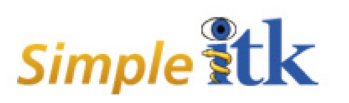

In [ ]:
logo = sitk.ReadImage(fdata('SimpleITK.jpg'))

plt.imshow(sitk.GetArrayViewFromImage(logo))
plt.axis('off');

## Image Construction

There are a variety of ways to create an image. 

The following components are required for a complete definition of an image:
<ol>
<li>Pixel type [fixed on creation, no default]: unsigned 32 bit integer, sitkVectorUInt8, etc., see list above.</li>
<li> Sizes [fixed on creation, no default]: number of pixels/voxels in each dimension. This quantity implicitly defines the image dimension.</li>
<li> Origin [default is zero]: coordinates of the pixel/voxel with index (0,0,0) in physical units (i.e. mm).</li>
<li> Spacing [default is one]: Distance between adjacent pixels/voxels in each dimension given in physical units.</li>
<li> Direction matrix [default is identity]: mapping, rotation, between direction of the pixel/voxel axes and physical directions.</li>
</ol>

Initial pixel/voxel values are set to zero.

In [ ]:
image_3D = sitk.Image(256, 128, 64, sitk.sitkInt16)
image_2D = sitk.Image(64, 64, sitk.sitkFloat32)
image_2D = sitk.Image([32,32], sitk.sitkUInt32)
image_RGB = sitk.Image([128,64], sitk.sitkVectorUInt8, 3)

## Basic Image Attributes

You can change the image origin, spacing and direction. Making such changes to an image already containing data should be done cautiously. 

In [ ]:
image_3D.SetOrigin((78.0, 76.0, 77.0))
image_3D.SetSpacing([0.5,0.5,3.0])

print(image_3D.GetOrigin())
print(image_3D.GetSize())
print(image_3D.GetSpacing())
print(image_3D.GetDirection())

(78.0, 76.0, 77.0)
(256, 128, 64)
(0.5, 0.5, 3.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)


Image dimension queries:

In [ ]:
print(image_3D.GetDimension())
print(image_3D.GetWidth())
print(image_3D.GetHeight())
print(image_3D.GetDepth())

3
256
128
64


What is the depth of a 2D image?

In [ ]:
print(image_2D.GetSize())
print(image_2D.GetDepth())

(32, 32)
0


Pixel/voxel type queries: 

In [ ]:
print(image_3D.GetPixelIDValue())
print(image_3D.GetPixelIDTypeAsString())
print(image_3D.GetNumberOfComponentsPerPixel())

2
16-bit signed integer
1


What is the dimension and size of a Vector image and its data?

In [ ]:
print(image_RGB.GetDimension())
print(image_RGB.GetSize())
print(image_RGB.GetNumberOfComponentsPerPixel())

2
(128, 64)
3


## Accessing Pixels and Slicing

The Image class's member functions ``GetPixel`` and ``SetPixel`` provide an ITK-like interface for pixel access.

In [ ]:
help(image_3D.GetPixel)

Help on method GetPixel in module SimpleITK.SimpleITK:

GetPixel(*idx) method of SimpleITK.SimpleITK.Image instance
    Returns the value of a pixel.
    
    This method takes 2 parameters in 2D: the x and y index,
    and 3 parameters in 3D: the x, y and z index.



In [ ]:
print(image_3D.GetPixel(0, 0, 0))
image_3D.SetPixel(0, 0, 0, 1)
print(image_3D.GetPixel(0, 0, 0))

# This can also be done using Pythonic notation.
print(image_3D[0,0,1])
image_3D[0,0,1] = 2
print(image_3D[0,0,1])

0
1
0
2


Slicing of SimpleITK images returns a copy of the image data. 

This is similar to slicing Python lists and differs from the "view" returned by slicing numpy arrays. 

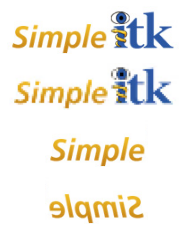

In [ ]:
# Brute force sub-sampling 
logo_subsampled = logo[::2,::2]

# Get the sub-image containing the word Simple
simple = logo[0:115,:]

# Get the sub-image containing the word Simple and flip it
simple_flipped = logo[115:0:-1,:]

n = 4

plt.subplot(n,1,1)
plt.imshow(sitk.GetArrayViewFromImage(logo))
plt.axis('off');

plt.subplot(n,1,2)
plt.imshow(sitk.GetArrayViewFromImage(logo_subsampled))
plt.axis('off');

plt.subplot(n,1,3)
plt.imshow(sitk.GetArrayViewFromImage(simple))
plt.axis('off')

plt.subplot(n,1,4)
plt.imshow(sitk.GetArrayViewFromImage(simple_flipped))
plt.axis('off');

Draw a square on top of the logo image:
After running this cell, uncomment "Version 3" and see its effect.

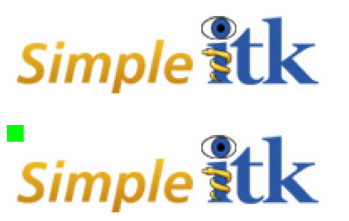

In [ ]:
# Version 0: get the numpy array and assign the value via broadcast - later on you will need to construct 
# a new image from the array 
logo_pixels = sitk.GetArrayFromImage(logo)
logo_pixels[0:10,0:10] = [0,255,0]

# Version 1: generates an error, the image slicing returns a new image and you cannot assign a value to an image 
#logo[0:10,0:10] = [255,0,0]

# Version 2: image slicing returns a new image, so all assignments here will not have any effect on the original
# 'logo' image
logo_subimage = logo[0:10, 0:10]
for x in range(0,10):
    for y in range(0,10):
        logo_subimage[x,y] = [255,0,0]

# Version 3: modify the original image, iterate and assign a value to each pixel
#for x in range(0,10):
#    for y in range(0,10):
#        logo[x,y] = [255,0,0]

        
plt.subplot(2,1,1)
plt.imshow(sitk.GetArrayViewFromImage(logo))
plt.axis('off')

plt.subplot(2,1,2)
plt.imshow(logo_pixels)
plt.axis('off');

We can also paste one image into the other, either using the [PasteImageFilter](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1PasteImageFilter.html) with its procedural interface or using a more Pythonic approach with image slicing. Note that for these operations SimpleITK treats the images as arrays of pixels and not as spatial objects. In the example below the fact that the images have different spacings is ignored.

In [ ]:
logo = sitk.ReadImage(fdata('SimpleITK.jpg'))

sz_x = 10
sz_y = 10
color_channels = [sitk.Image([sz_x,sz_y], sitk.sitkUInt8),
                  sitk.Image([sz_x,sz_y], sitk.sitkUInt8)+255,
                  sitk.Image([sz_x,sz_y], sitk.sitkUInt8)]
color_image = sitk.Compose(color_channels)
color_image.SetSpacing([0.5,0.5])

print(logo.GetSpacing())
print(color_image.GetSpacing())

#Set sub image using the Paste function
logo = sitk.Paste(destinationImage=logo, 
                 sourceImage=color_image,
                 sourceSize=color_image.GetSize(),
                 sourceIndex=[0,0],
                 destinationIndex=[0,0])
#Set sub image using slicing.
logo[20:20+sz_x, 20:20+sz_y] = color_image

sitk.Show(logo)

Fetching SimpleITK.jpg
(1.0, 1.0)
(0.5, 0.5)


## Conversion between numpy and SimpleITK

SimpleITK and numpy indexing access is in opposite order! 

SimpleITK: image[x,y,z]<br>
numpy: image_numpy_array[z,y,x]

### From SimpleITK to numpy

We have two options for converting from SimpleITK to numpy:
* GetArrayFromImage(): returns a copy of the image data. You can then freely modify the data as it has no effect on the original SimpleITK image.
* GetArrayViewFromImage(): returns a view on the image data which is useful for display in a memory efficient manner. You cannot modify the data and __the view will be invalid if the original SimpleITK image is deleted__.

In [ ]:
nda = sitk.GetArrayFromImage(image_3D)
print(image_3D.GetSize())
print(nda.shape)

nda = sitk.GetArrayFromImage(image_RGB)
print(image_RGB.GetSize())
print(nda.shape)

(256, 128, 64)
(64, 128, 256)
(128, 64)
(64, 128, 3)


ValueError: ignored

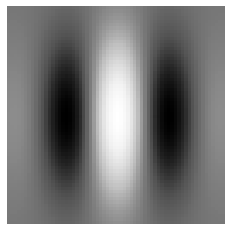

In [ ]:
gabor_image = sitk.GaborSource(size=[64,64], frequency=.03)
# Getting a numpy array view on the image data doesn't copy the data
nda_view = sitk.GetArrayViewFromImage(gabor_image)
plt.imshow(nda_view, cmap=plt.cm.Greys_r)
plt.axis('off');

# Trying to assign a value to the array view will throw an exception
nda_view[0,0] = 255

### From numpy to SimpleITK

Remember to to set the image's origin, spacing, and possibly direction cosine matrix. The default values may not match the physical dimensions of your image.

In [ ]:
nda = np.zeros((10,20,3))

        #if this is supposed to be a 3D gray scale image [x=3, y=20, z=10]
img = sitk.GetImageFromArray(nda)
print(img.GetSize())

      #if this is supposed to be a 2D color image [x=20,y=10]
img = sitk.GetImageFromArray(nda, isVector=True)
print(img.GetSize())

### There and back again

The following code cell illustrates a situation where your code is a combination of SimpleITK methods and custom Python code which works with intensity values or labels outside of SimpleITK. This is a reasonable approach when you implement an algorithm in Python and don't care about the physical spacing of things (you are actually assuming the volume is isotropic). 

In [ ]:
def my_algorithm(image_as_numpy_array):
    # res is the image result of your algorithm, has the same grid size as the original image
    res = image_as_numpy_array
    return res

# Starting with SimpleITK
img = sitk.ReadImage(fdata('training_001_mr_T1.mha'))

# Custom Python code working on a numpy array.
npa_res = my_algorithm(sitk.GetArrayFromImage(img))

# Converting back to SimpleITK (assumes we didn't move the image in space as we copy the information from the original)
res_img = sitk.GetImageFromArray(npa_res)
res_img.CopyInformation(img)

# Continuing to work with SimpleITK images
res_img - img

### Image operations

SimpleITK supports basic arithmetic operations between images, <b>taking into account their physical space</b>.

Repeatedly run this cell. Fix the error (comment out the SetDirection, then SetSpacing). Why doesn't the SetOrigin line cause a problem? How close do two physical attributes need to be in order to be considered equivalent?

In [ ]:
img1 = sitk.Image(24,24, sitk.sitkUInt8)
img1[0,0] = 0

img2 = sitk.Image(img1.GetSize(), sitk.sitkUInt8)
img2.SetDirection([0,1,0.5,0.5])
img2.SetSpacing([0.5,0.8])
img2.SetOrigin([0.000001,0.000001])
img2[0,0] = 255

img3 = img1 + img2
print(img3[0,0])

## Reading and Writing

SimpleITK can read and write images stored in a single file, or a set of files (e.g. DICOM series).

Images stored in the DICOM format have a meta-data dictionary associated with them, which is populated with the DICOM tags. When a DICOM series is read as a single image, the meta-data information is not available since DICOM tags are specific to each file. If you need the meta-data, you have three options:

1. Using the object oriented interface's [ImageSeriesReader](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1ImageSeriesReader.html) class, configure it to load the tags using the `MetaDataDictionaryArrayUpdateOn` method and possibly the `LoadPrivateTagsOn` method if you need the private tags. Once the series is read you can access the meta-data from the series reader using the `GetMetaDataKeys`, `HasMetaDataKey`, and `GetMetaData`.

2. Using the object oriented interface's [ImageFileReader](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1ImageFileReader.html), set a specific slice's file name and only read it's meta-data using the `ReadImageInformation` method which only reads the meta-data but not the bulk pixel information. Once the meta-data is read you can access it from the file reader using the `GetMetaDataKeys`, `HasMetaDataKey`, and `GetMetaData`.

3. Using the object oriented interface's [ImageFileReader](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1ImageFileReader.html), set a specific slice's file name and read it. Or using the procedural interface's, [ReadImage](https://simpleitk.org/doxygen/latest/html/namespaceitk_1_1simple.html#ae3b678b5b043c5a8c93aa616d5ee574c) function, read a specific file. You can then access the meta-data directly from the [Image](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1Image.html) using the `GetMetaDataKeys`, `HasMetaDataKey`, and `GetMetaData`.

In the following cell, we read an image in JPEG format, and write it as PNG and BMP. File formats are deduced from the file extension. Appropriate pixel type is also set - you can override this and force a pixel type of your choice.

In [ ]:
img = sitk.ReadImage(fdata('SimpleITK.jpg'))
print(img.GetPixelIDTypeAsString())

# write as PNG and BMP
sitk.WriteImage(img, os.path.join(OUTPUT_DIR, 'SimpleITK.png'))
sitk.WriteImage(img, os.path.join(OUTPUT_DIR, 'SimpleITK.bmp'))

Read an image in JPEG format and cast the pixel type according to user selection.

In [ ]:
# Several pixel types, some make sense in this case (vector types) and some are just show
# that the user's choice will force the pixel type even when it doesn't make sense
# (e.g. sitkVectorUInt16 or sitkUInt8).
pixel_types = { 'sitkUInt8': sitk.sitkUInt8,
                'sitkUInt16' : sitk.sitkUInt16,
                'sitkFloat64' : sitk.sitkFloat64,
                'sitkVectorUInt8' : sitk.sitkVectorUInt8,
                'sitkVectorUInt16' : sitk.sitkVectorUInt16,
                'sitkVectorFloat64' : sitk.sitkVectorFloat64}

def pixel_type_dropdown_callback(pixel_type, pixel_types_dict):
    #specify the file location and the pixel type we want
    img = sitk.ReadImage(fdata('SimpleITK.jpg'), pixel_types_dict[pixel_type])
    
    print(img.GetPixelIDTypeAsString())
    print(img[0,0])
    plt.imshow(sitk.GetArrayViewFromImage(img))
    plt.axis('off')
 
interact(pixel_type_dropdown_callback, pixel_type=list(pixel_types.keys()), pixel_types_dict=fixed(pixel_types));     

Read a DICOM series and write it as a single mha file

In [ ]:
data_directory = os.path.dirname(fdata("CIRS057A_MR_CT_DICOM/readme.txt"))
series_ID = '1.2.840.113619.2.290.3.3233817346.783.1399004564.515'

# Get the list of files belonging to a specific series ID.
reader = sitk.ImageSeriesReader()
# Use the functional interface to read the image series.
original_image = sitk.ReadImage(reader.GetGDCMSeriesFileNames(data_directory, series_ID))

# Write the image.
output_file_name_3D = os.path.join(OUTPUT_DIR, '3DImage.mha')
sitk.WriteImage(original_image, output_file_name_3D)

# Read it back again.
written_image = sitk.ReadImage(output_file_name_3D)

# Check that the original and written image are the same.
statistics_image_filter = sitk.StatisticsImageFilter()
statistics_image_filter.Execute(original_image - written_image)

# Check that the original and written files are the same
print(f'Max, Min differences are : {statistics_image_filter.GetMaximum()}, {statistics_image_filter.GetMinimum()}')

Write an image series as JPEG. The WriteImage function receives a volume and a list of images names and writes the volume according to the z axis. For a displayable result we need to rescale the image intensities (default is [0,255]) since the JPEG format requires a cast to the UInt8 pixel type.

In [ ]:
sitk.WriteImage(sitk.Cast(sitk.RescaleIntensity(written_image), sitk.sitkUInt8), 
                [os.path.join(OUTPUT_DIR, f'slice{i:03d}.jpg') for i in range(written_image.GetSize()[2])]) 

Select a specific DICOM series from a directory and only then load user selection.

In [ ]:
data_directory = os.path.dirname(fdata("CIRS057A_MR_CT_DICOM/readme.txt"))
# Global variable 'selected_series' is updated by the interact function
selected_series = ''
file_reader = sitk.ImageFileReader()
def DICOM_series_dropdown_callback(series_to_load, series_dictionary):
    global selected_series
               # Print some information about the series from the meta-data dictionary
               # DICOM standard part 6, Data Dictionary: http://medical.nema.org/medical/dicom/current/output/pdf/part06.pdf
    file_reader.SetFileName(series_dictionary[series_to_load][0])
    file_reader.ReadImageInformation()
    tags_to_print = {'0010|0010': 'Patient name: ', 
                     '0008|0060' : 'Modality: ',
                     '0008|0021' : 'Series date: ',
                     '0008|0080' : 'Institution name: ',
                     '0008|1050' : 'Performing physician\'s name: '}
    for tag in tags_to_print:
        try:
            print(tags_to_print[tag] + file_reader.GetMetaData(tag))
        except: # Ignore if the tag isn't in the dictionary
            pass
    selected_series = series_to_load                    

# Directory contains multiple DICOM studies/series, store
             # in dictionary with key being the series ID
reader = sitk.ImageSeriesReader()
series_file_names = {}
series_IDs = reader.GetGDCMSeriesIDs(data_directory)
            # Check that we have at least one series
if series_IDs:
    for series in series_IDs:
        series_file_names[series] = reader.GetGDCMSeriesFileNames(data_directory, series)
    
    interact(DICOM_series_dropdown_callback, series_to_load=list(series_IDs), series_dictionary=fixed(series_file_names)); 
else:
    print('Data directory does not contain any DICOM series.')

In [ ]:
reader.SetFileNames(series_file_names[selected_series])
img = reader.Execute()
# Display the image slice from the middle of the stack, z axis
z = int(img.GetDepth()/2)
plt.imshow(sitk.GetArrayViewFromImage(img)[z,:,:], cmap=plt.cm.Greys_r)
plt.axis('off');

### DICOM photometric interpretation 

Generally speaking, SimpleITK represents color images as multi-channel images independent of a [color space](https://en.wikipedia.org/wiki/Color_space). It is up to you to interpret the channels correctly based on additional color space knowledge prior to using them for display or any other purpose.

The following cells illustrate reading and interpretation of interesting images in DICOM format. The first is a photograph of an X-ray on a light box (yes, there are some strange things in the wild). The second is a digital X-ray. While both of these are chest X-rays they differ in image modality (0008|0060) and in Photometric Interpretation (0028|0004), color space in DICOM speak.

Things to note:
1. When using SimpleITK to read a color DICOM image, the channel values will be transformed to the RGB color space.
2. When using SimpleITK to read a scalar image, it is assumed that the lowest intensity value is black and highest white. If the photometric interpretation tag is MONOCHROME2 (lowest value displayed as black) nothing is done. If it is MONOCHROME1 (lowest value displayed as white), the pixel values are inverted.

In [ ]:
xrays = [sitk.ReadImage(fdata('photo.dcm')),
         sitk.ReadImage(fdata('cxr.dcm'))]
for img in xrays:
    print(f'Image Modality: {img.GetMetaData("0008|0060")}')
    print(f'Number of channels: {img.GetNumberOfComponentsPerPixel()}')
    print(f'Photomertic Interpretation: {img.GetMetaData("0028|0004")}')
    # Display the image using Fiji which expects the channels to be in the RGB color space
    sitk.Show(img)

The first, is a color sRGB image while an x-ray should be a single channel gray scale image. We will [convert sRGB to gray scale](https://en.wikipedia.org/wiki/Grayscale#Converting_color_to_grayscale).

In [ ]:
def srgb2gray(image):
    # Convert sRGB image to gray scale and rescale results to [0,255]    
    channels = [sitk.VectorIndexSelectionCast(image,i, sitk.sitkFloat32) for i in range(image.GetNumberOfComponentsPerPixel())]
    #linear mapping
    I = 1/255.0*(0.2126*channels[0] + 0.7152*channels[1] + 0.0722*channels[2])
    #nonlinear gamma correction
    I = I*sitk.Cast(I<=0.0031308,sitk.sitkFloat32)*12.92 + I**(1/2.4)*sitk.Cast(I>0.0031308,sitk.sitkFloat32)*1.055-0.055
    return sitk.Cast(sitk.RescaleIntensity(I), sitk.sitkUInt8)

sitk.Show(srgb2gray(xrays[0]))

### Finer control

The ImageFileReader's interface provides finer control for reading, allowing us to require the use of a specific IO and allowing us to stream parts of an image to memory without reading the whole image (supported by a subset of the ImageIO components).

#### Selecting a Specific Image IO
SimpleITK relies on the registered ImageIOs to indicate whether they can read a file and then perform the reading. This is done automatically, going over the set of ImageIOs and inquiring whether they can read the given file. The first one that can is selected. If multiple ImageIOs can read a specific format, we do not know which one was used for the task (e.g. TIFFImageIO and LSMImageIO, which is derived from it, can both read tif files). In some cases you may want to use a specific IO, possibly one that reads the file faster, or supports a more complete feature set associated with the file format.

The next cell shows how to find out which ImageIOs are registered and specify the one we want.

In [ ]:
file_reader = sitk.ImageFileReader()

# Get a tuple listing all registered ImageIOs
image_ios_tuple = file_reader.GetRegisteredImageIOs()
print("The supported image IOs are: " + str(image_ios_tuple))

# Optionally, just print the reader and see which ImageIOs are registered
print('\n',file_reader)

# Specify the JPEGImageIO and read file
file_reader.SetImageIO('JPEGImageIO')
file_reader.SetFileName(fdata('SimpleITK.jpg'))
logo = file_reader.Execute()

# Unfortunately, now reading a non JPEG image will fail
try:
    file_reader.SetFileName(fdata('cthead1.png'))
    ct_head = file_reader.Execute()
except RuntimeError:
    print('Got a RuntimeError exception.')
    
# We can reset the file reader to its default behaviour so that it automatically 
# selects the ImageIO
file_reader.SetImageIO('')
ct_head = file_reader.Execute()

#### Streaming Image IO

Some of the ImageIOs supported in SimpleITK allow you to stream in sub-regions of an image without the need to read the whole image into memory. This is very useful when you are memory constrained (either your images are large or your memory is limited). 

The ImageIOs that support streaming include HDF5ImageIO, VTKImageIO, NiftiImageIO, MetaImageIO...

The next cell shows how to read in a sub/cropped image from a larger image. We read the central 1/3 portion of the image [1/3,2/3] of the original image.

In [ ]:
file_reader = sitk.ImageFileReader()
file_reader.SetFileName(fdata('vm_head_rgb.mha'))

file_reader.ReadImageInformation()
image_size = file_reader.GetSize()
start_index, extract_size = zip(*[(int(1.0/3.0*sz), int(1.0/3.0*sz)) for sz in file_reader.GetSize()])

file_reader.SetExtractIndex(start_index)
file_reader.SetExtractSize(extract_size)

sitk.Show(file_reader.Execute())

The next cells show how to subtract two large images from each other with a smaller memory footprint than the direct approach, though the code is much more complex and slower than the direct approach:

```
sitk.ReadImage(image1_file_name) - sitk.ReadImage(image2_file_name)
```

**Note**: The code assume that the two images occupy the same spatial region (origin, spacing, direction cosine matrix).



In [ ]:
def streaming_subtract(image1_file_name, image2_file_name, parts):
    '''
    Subtract image1 from image2 using 'parts' number of sub-regions.
    '''
    file_reader = sitk.ImageFileReader()
    file_reader.SetFileName(image1_file_name)
    file_reader.ReadImageInformation()
    image_size = file_reader.GetSize()

    # Create the result image, initially empty
    result_img = sitk.Image(file_reader.GetSize(), file_reader.GetPixelID(), file_reader.GetNumberOfComponents())
    result_img.SetSpacing(file_reader.GetSpacing())
    result_img.SetOrigin(file_reader.GetOrigin())
    result_img.SetDirection(file_reader.GetDirection())

    extract_size = list(file_reader.GetSize())
    extract_size[-1] = extract_size[-1]//parts
    current_index = [0]*file_reader.GetDimension()
    for i in range(parts):
        if i == (parts-1): # last region may be smaller than the standard extract region
            extract_size[-1] = image_size[-1] - current_index[-1]
        file_reader.SetFileName(image1_file_name)
        file_reader.SetExtractIndex(current_index)
        file_reader.SetExtractSize(extract_size)
        sub_image1 = file_reader.Execute()

        file_reader.SetFileName(image2_file_name)
        file_reader.SetExtractIndex(current_index)
        file_reader.SetExtractSize(extract_size)
        sub_image2 = file_reader.Execute()
        # Paste the result of subtracting the two subregions into their location in the result_img
        result_img = sitk.Paste(result_img, sub_image1 - sub_image2, extract_size, [0]*file_reader.GetDimension(), current_index)
        current_index[-1] += extract_size[-1]        
    return result_img

# If you have the patience and RAM you can try this with the vm_head_rgb.mha image.
image1_file_name = fdata('fib_sem_bacillus_subtilis.mha')
image2_file_name = fdata('fib_sem_bacillus_subtilis.mha')

A simple way of seeing your system's memory usage is to open the appropriate monitoring program: (Windows) Resource Monitor; (Linux) top; (OS X) Activity Monitor. This will give you a rough idea of the memory used by the streaming vs. non streaming approaches.

In [ ]:
result_img = streaming_subtract(image1_file_name, image2_file_name, parts=5)
del result_img

In [ ]:
result_img = sitk.ReadImage(image1_file_name) - sitk.ReadImage(image2_file_name)
del result_img